# Decision Trees
From Hands-On Machine Learning with Scikit-learn, Keras, and TensorFlow chapter 6

In [13]:
import graphviz
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [5]:
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target


In [6]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [11]:
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

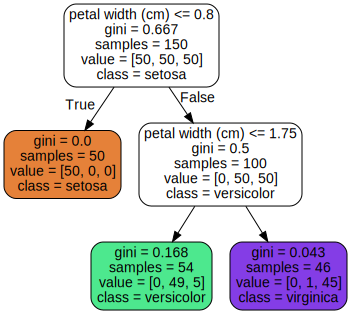

In [15]:
# in terminal for png $ dot -Tpng iris_tree.dot -o iris_tree.png
# using following for in notebook
with open("iris_tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [17]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [18]:
tree_clf.predict([[5,1.5]])

array([1])

One of the many qualities of Decision Trees is that they require very little data preparation. In fact, they
don’t require feature scaling or centering at all.

Scikit-Learn uses the CART algorithm, which produces only binary trees: nonleaf nodes always have two
children (i.e., questions only have yes/no answers). However, other algorithms such as ID3 can produce
Decision Trees with nodes that have more than two children.

Decision Trees are intuitive, and their decisions are easy to interpret. Such models are
often called white box models. In contrast, as we will see, Random Forests or neural
networks are generally considered black box models. They make great predictions, and
you can easily check the calculations that they performed to make these predictions;
nevertheless, it is usually hard to explain in simple terms why the predictions were
made. For example, if a neural network says that a particular person appears on a
picture, it is hard to know what contributed to this prediction: did the model recognize
that person’s eyes? Their mouth? Their nose? Their shoes? Or even the couch that they
were sitting on? Conversely, Decision Trees provide nice, simple classification rules that
can even be applied manually if need be (e.g., for flower classification).

Decision Trees are intuitive, and their decisions are easy to interpret. Such models are
often called white box models. In contrast, as we will see, Random Forests or neural
networks are generally considered black box models. They make great predictions, and
you can easily check the calculations that they performed to make these predictions;
nevertheless, it is usually hard to explain in simple terms why the predictions were
made. For example, if a neural network says that a particular person appears on a
picture, it is hard to know what contributed to this prediction: did the model recognize
that person’s eyes? Their mouth? Their nose? Their shoes? Or even the couch that they
were sitting on? Conversely, Decision Trees provide nice, simple classification rules that
can even be applied manually if need be (e.g., for flower classification).

pg 255 for Gini impurity or entropy along with reularization hyperparameters


Other algorithms work by first training the Decision Tree without restrictions, then pruning (deleting)
unnecessary nodes. A node whose children are all leaf nodes is considered unnecessary if the purity
improvement it provides is not statistically significant. Standard statistical tests, such as the χ2 test (chi-
squared test), are used to estimate the probability that the improvement is purely the result of chance (which
is called the null hypothesis). If this probability, called the p-value, is higher than a given threshold
(typically 5%, controlled by a hyperparameter), then the node is considered unnecessary and its children are
deleted. The pruning continues until all unnecessary nodes have been pruned.